<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [41]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [42]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [43]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [44]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [45]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [46]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [47]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [48]:
# TASK 1


Y = data['Class'].to_numpy()


print(type(Y))
print(Y[:10])  # show first 10 elements for inspection


<class 'numpy.ndarray'>
[0 0 0 0 0 0 1 1 0 0]


## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [49]:
# Create an instance of the StandardScaler
transform = preprocessing.StandardScaler()

# Fit the scaler on X and transform it
X = transform.fit_transform(X)

# X is now a NumPy array containing standardized values
print(X.shape)
print(X[:5])  # Preview the first 5 rows


(90, 83)
[[-1.71291154e+00 -1.94814463e-16 -6.53912840e-01 -1.57589457e+00
  -9.73440458e-01 -1.05999788e-01 -1.05999788e-01 -6.54653671e-01
  -1.05999788e-01 -5.51677284e-01  3.44342023e+00 -1.85695338e-01
  -3.33333333e-01 -1.05999788e-01 -2.42535625e-01 -4.29197538e-01
   7.97724035e-01 -5.68796459e-01 -4.10890702e-01 -4.10890702e-01
  -1.50755672e-01 -7.97724035e-01 -1.50755672e-01 -3.92232270e-01
   9.43398113e+00 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.05999788e-01 -1.05999788e-01
  -1.05999788e-01 -1.50755672e-01 -1.05999788e-01 -1.50755672e-01
  -1.50755672e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
  -1.05999788e-01 -1.05999788e-01 -1.50755672e-01 -1.50755672e-01
 

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [50]:
# Assuming Y is your target variable
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=2
)


we can see we only have 18 test samples.


In [51]:
Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning Libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Classifiers
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Evaluation Metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, roc_curve



# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')


In [58]:
from sklearn.linear_model import LogisticRegression

# Define Pipeline for Logistic Regression
logreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', LogisticRegression(random_state=42, max_iter=1000))
])

# Define parameter grid with pipeline steps
logreg_parameters = {
    'classifier__C': np.logspace(-3, 3, 7),       # Regularization strength
    'classifier__penalty': ['l1', 'l2'],          # Regularization type
    'classifier__solver': ['liblinear']           # Solver that supports L1
}



We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


In [59]:
# Initialize GridSearchCV for Logistic Regression
logreg_cv = GridSearchCV(
    estimator=logreg_pipeline,
    param_grid=logreg_parameters,
    cv=10,                                    # 10-fold cross-validation
    scoring='accuracy',                       # Evaluation metric
    n_jobs=-1,                                # Utilize all CPU cores
    verbose=1                                 # Verbosity level
)
# Fit GridSearchCV to the training data
logreg_cv.fit(X_train, Y_train)



Fitting 10 folds for each of 14 candidates, totalling 140 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__penalty': ['l1', 'l2'],
                         'classifier__solver': ['liblinear']},
             scoring='accuracy', verbose=1)

In [60]:
# Calculate test accuracy
logreg_test_accuracy = logreg_cv.score(X_test, Y_test)

# Generate ROC-AUC score
logreg_roc_auc = roc_auc_score(Y_test, logreg_cv.predict_proba(X_test)[:,1])

# Print best parameters and scores
print("Logistic Regression Best Parameters:", logreg_cv.best_params_)
print("Logistic Regression Best CV Accuracy:", logreg_cv.best_score_)
print("Logistic Regression Test Accuracy:", logreg_test_accuracy)
print("Logistic Regression ROC-AUC Score:", logreg_roc_auc)


Logistic Regression Best Parameters: {'classifier__C': 0.1, 'classifier__penalty': 'l1', 'classifier__solver': 'liblinear'}
Logistic Regression Best CV Accuracy: 0.8339285714285714
Logistic Regression Test Accuracy: 0.8333333333333334
Logistic Regression ROC-AUC Score: 0.8819444444444444


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


In [22]:
# Calculate accuracy on the test data
test_accuracy = logreg_cv.score(X_test, Y_test)
print("Test Set Accuracy:", test_accuracy)


Test Set Accuracy: 0.8333333333333334


Lets look at the confusion matrix:


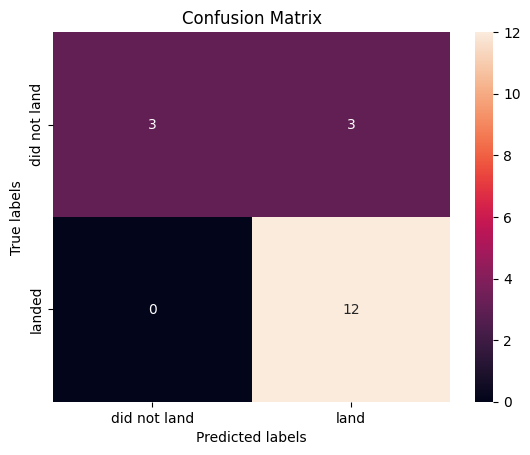

In [61]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [62]:
from sklearn.svm import SVC

# Define Pipeline for SVM
svm_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', SVC(probability=True, random_state=42))
])

# Define parameter grid with pipeline steps
svm_parameters = {
    'classifier__C': np.logspace(-3, 3, 7),
    'classifier__gamma': np.logspace(-3, 3, 7),
    'classifier__kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}


In [63]:
# Initialize GridSearchCV for SVM
svm_cv = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
# Fit GridSearchCV to the training data
svm_cv.fit(X_train, Y_train)


Fitting 10 folds for each of 196 candidates, totalling 1960 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier',
                                        SVC(probability=True,
                                            random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__gamma': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'classifier__kernel': ['linear', 'rbf', 'poly',
                                                'sigmoid']},
             scoring='accuracy', verbose=1)

In [64]:
# Calculate test accuracy
svm_test_accuracy = svm_cv.score(X_test, Y_test)

# Generate ROC-AUC score
svm_roc_auc = roc_auc_score(Y_test, svm_cv.predict_proba(X_test)[:,1])

# Print best parameters and scores
print("SVM Best Parameters:", svm_cv.best_params_)
print("SVM Best CV Accuracy:", svm_cv.best_score_)
print("SVM Test Accuracy:", svm_test_accuracy)
print("SVM ROC-AUC Score:", svm_roc_auc)


SVM Best Parameters: {'classifier__C': 0.01, 'classifier__gamma': 0.001, 'classifier__kernel': 'linear'}
SVM Best CV Accuracy: 0.8482142857142858
SVM Test Accuracy: 0.8333333333333334
SVM ROC-AUC Score: 0.8333333333333334


## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


We can plot the confusion matrix


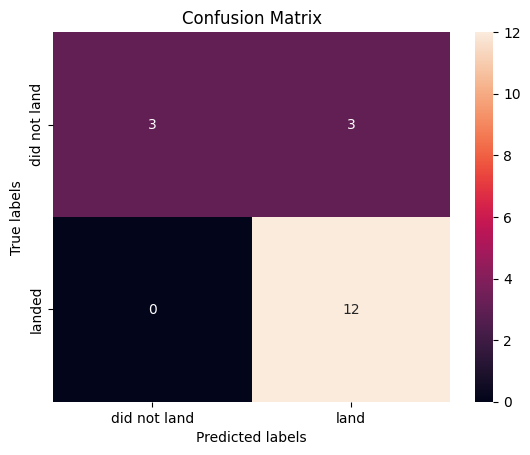

In [65]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [66]:
from sklearn.tree import DecisionTreeClassifier

# Define Pipeline for Decision Tree
tree_pipeline = Pipeline([
    ('classifier', DecisionTreeClassifier(random_state=42))
])

# Define parameter grid with pipeline steps
tree_parameters = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__splitter': ['best', 'random'],
    'classifier__max_depth': [2 * n for n in range(1, 10)],  # [2, 4, 6, 8, 10, 12, 14, 16, 18]
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__min_samples_split': [2, 5, 10]
}


In [67]:
# Initialize GridSearchCV for Decision Tree
tree_cv = GridSearchCV(
    estimator=tree_pipeline,
    param_grid=tree_parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)
# Fit GridSearchCV to the training data
tree_cv.fit(X_train, Y_train)



Fitting 10 folds for each of 972 candidates, totalling 9720 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('classifier',
                                        DecisionTreeClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['gini', 'entropy'],
                         'classifier__max_depth': [2, 4, 6, 8, 10, 12, 14, 16,
                                                   18],
                         'classifier__max_features': ['sqrt', 'log2', None],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'classifier__splitter': ['best', 'random']},
             scoring='accuracy', verbose=1)

In [68]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)# Calculate test accuracy
tree_test_accuracy = tree_cv.score(X_test, Y_test)

# Generate ROC-AUC score
tree_roc_auc = roc_auc_score(Y_test, tree_cv.predict_proba(X_test)[:,1])

# Print best parameters and scores
print("Decision Tree Best Parameters:", tree_cv.best_params_)
print("Decision Tree Best CV Accuracy:", tree_cv.best_score_)
print("Decision Tree Test Accuracy:", tree_test_accuracy)
print("Decision Tree ROC-AUC Score:", tree_roc_auc)


tuned hpyerparameters :(best parameters)  {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__splitter': 'random'}
accuracy : 0.875
Decision Tree Best Parameters: {'classifier__criterion': 'entropy', 'classifier__max_depth': 8, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 2, 'classifier__min_samples_split': 2, 'classifier__splitter': 'random'}
Decision Tree Best CV Accuracy: 0.875
Decision Tree Test Accuracy: 0.9444444444444444
Decision Tree ROC-AUC Score: 0.875


## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


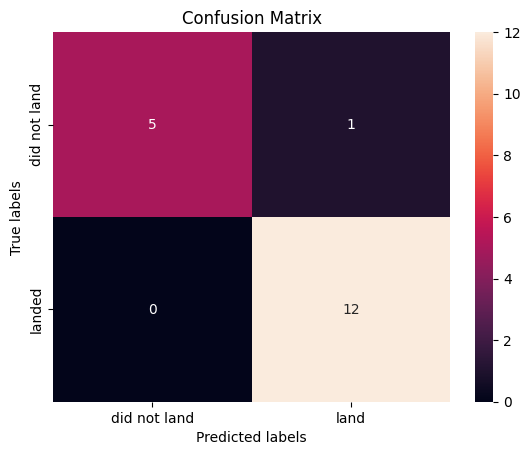

In [69]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


In [70]:
from sklearn.neighbors import KNeighborsClassifier

# Define Pipeline for KNN
knn_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('classifier', KNeighborsClassifier())
])

# Define parameter grid with pipeline steps
knn_parameters = {
    'classifier__n_neighbors': list(range(1, 11)),
    'classifier__algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'classifier__p': [1, 2]  # 1: Manhattan, 2: Euclidean
}


In [71]:
# Initialize GridSearchCV for KNN
knn_cv = GridSearchCV(
    estimator=knn_pipeline,
    param_grid=knn_parameters,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV to the training data
knn_cv.fit(X_train, Y_train)


Fitting 10 folds for each of 80 candidates, totalling 800 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'classifier__algorithm': ['auto', 'ball_tree',
                                                   'kd_tree', 'brute'],
                         'classifier__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                     10],
                         'classifier__p': [1, 2]},
             scoring='accuracy', verbose=1)

In [72]:
# Calculate test accuracy
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Generate ROC-AUC score
knn_roc_auc = roc_auc_score(Y_test, knn_cv.predict_proba(X_test)[:,1])

# Print best parameters and scores
print("KNN Best Parameters:", knn_cv.best_params_)
print("KNN Best CV Accuracy:", knn_cv.best_score_)
print("KNN Test Accuracy:", knn_test_accuracy)
print("KNN ROC-AUC Score:", knn_roc_auc)


KNN Best Parameters: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 10, 'classifier__p': 1}
KNN Best CV Accuracy: 0.8482142857142858
KNN Test Accuracy: 0.8333333333333334
KNN ROC-AUC Score: 0.8472222222222222


## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


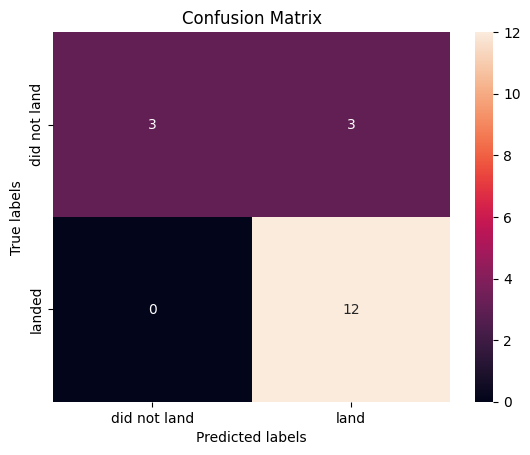

In [73]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

## TASK  12


Find the method performs best:


In [74]:
# Calculate test accuracy
knn_test_accuracy = knn_cv.score(X_test, Y_test)

# Generate ROC-AUC score
knn_roc_auc = roc_auc_score(Y_test, knn_cv.predict_proba(X_test)[:,1])

# Print best parameters and scores
print("KNN Best Parameters:", knn_cv.best_params_)
print("KNN Best CV Accuracy:", knn_cv.best_score_)
print("KNN Test Accuracy:", knn_test_accuracy)
print("KNN ROC-AUC Score:", knn_roc_auc)


KNN Best Parameters: {'classifier__algorithm': 'auto', 'classifier__n_neighbors': 10, 'classifier__p': 1}
KNN Best CV Accuracy: 0.8482142857142858
KNN Test Accuracy: 0.8333333333333334
KNN ROC-AUC Score: 0.8472222222222222


In [76]:
# Initialize a dictionary to store model performances
test_scores = {
    'Logistic Regression': {
        'Best Parameters': logreg_cv.best_params_,
        'Best CV Accuracy': round(logreg_cv.best_score_, 4),
        'Test Accuracy': round(logreg_test_accuracy, 4),
        'ROC-AUC Score': round(logreg_roc_auc, 4)
    },
    'SVM': {
        'Best Parameters': svm_cv.best_params_,
        'Best CV Accuracy': round(svm_cv.best_score_, 4),
        'Test Accuracy': round(svm_test_accuracy, 4),
        'ROC-AUC Score': round(svm_roc_auc, 4)
    },
    'Decision Tree': {
        'Best Parameters': tree_cv.best_params_,
        'Best CV Accuracy': round(tree_cv.best_score_, 4),
        'Test Accuracy': round(tree_test_accuracy, 4),
        'ROC-AUC Score': round(tree_roc_auc, 4)
    },
    'KNN': {
        'Best Parameters': knn_cv.best_params_,
        'Best CV Accuracy': round(knn_cv.best_score_, 4),
        'Test Accuracy': round(knn_test_accuracy, 4),
        'ROC-AUC Score': round(knn_roc_auc, 4)
    }
}


In [77]:
# Convert the dictionary to a DataFrame
performance_df = pd.DataFrame(test_scores).T  # Transpose for better readability

# Display the DataFrame
print(performance_df)


                                                       Best Parameters  \
Logistic Regression  {'classifier__C': 0.1, 'classifier__penalty': ...   
SVM                  {'classifier__C': 0.01, 'classifier__gamma': 0...   
Decision Tree        {'classifier__criterion': 'entropy', 'classifi...   
KNN                  {'classifier__algorithm': 'auto', 'classifier_...   

                    Best CV Accuracy Test Accuracy ROC-AUC Score  
Logistic Regression           0.8339        0.8333        0.8819  
SVM                           0.8482        0.8333        0.8333  
Decision Tree                  0.875        0.9444         0.875  
KNN                           0.8482        0.8333        0.8472  


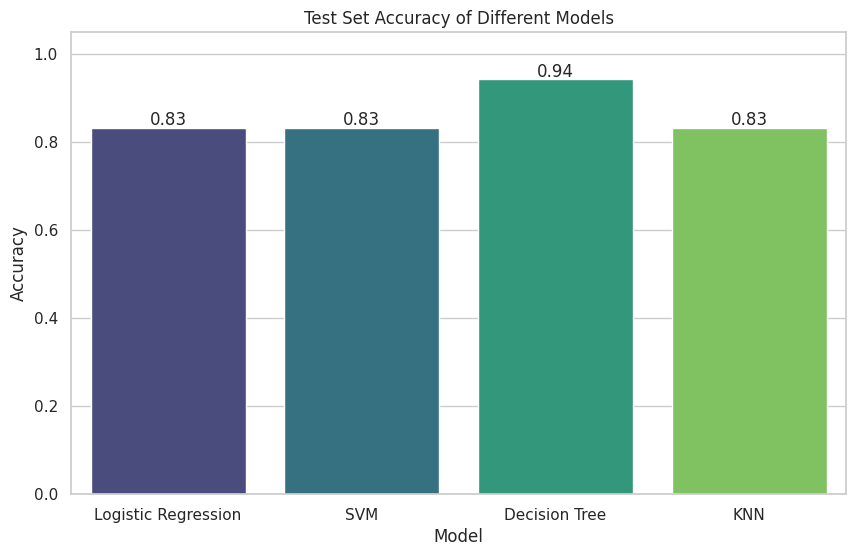

In [78]:
# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Create a bar plot for Test Set Accuracy
plt.figure(figsize=(10,6))
sns.barplot(x=performance_df.index, y='Test Accuracy', data=performance_df, palette='viridis')

# Annotate each bar with the accuracy value
for index, row in performance_df.iterrows():
    plt.text(index, row['Test Accuracy'] + 0.005, f"{row['Test Accuracy']:.2f}", ha='center')

plt.title('Test Set Accuracy of Different Models')
plt.ylim(0, 1.05)  # Set y-axis limits from 0 to slightly above 1
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.show()


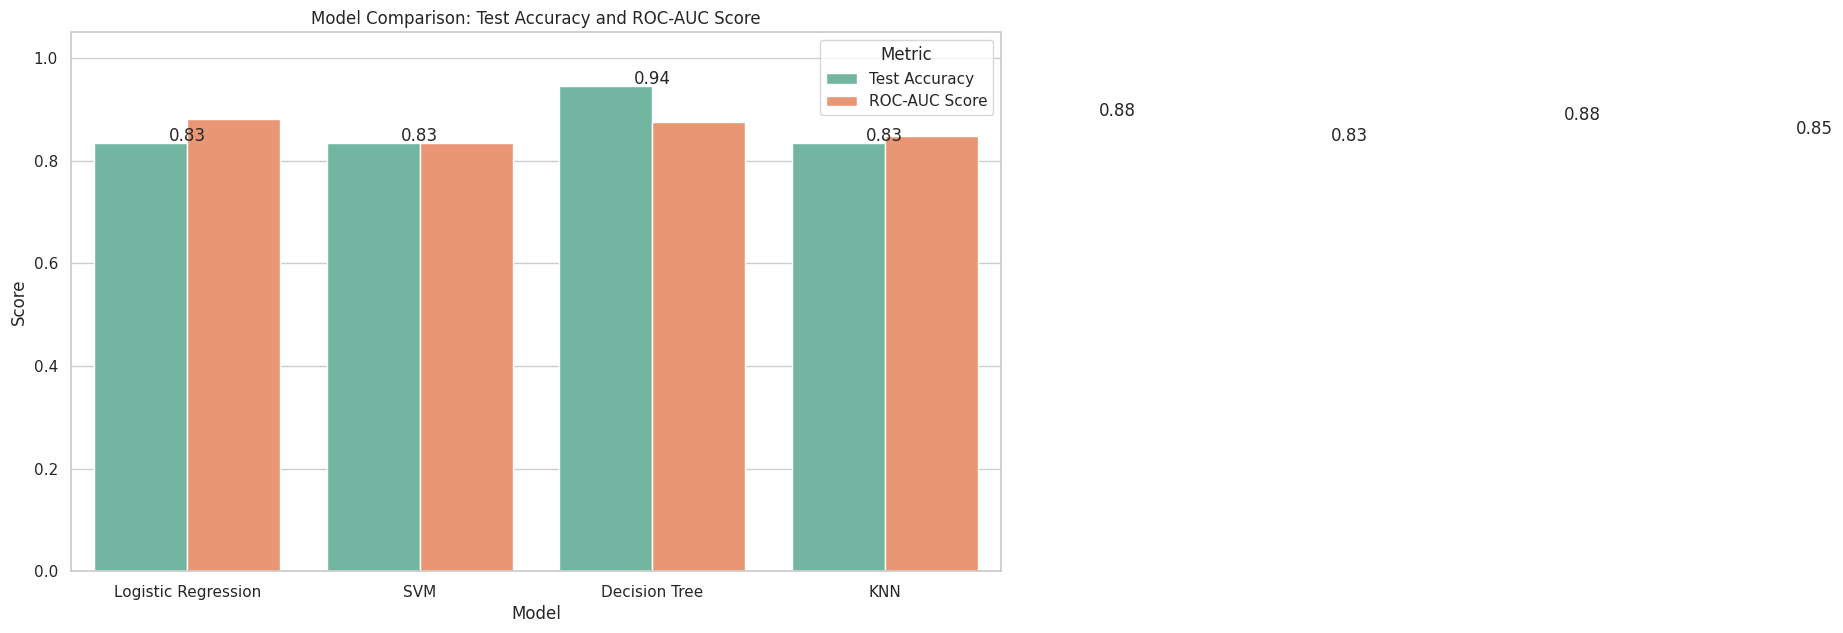

In [79]:
# Melt the DataFrame for seaborn
melted_df = performance_df.reset_index().melt(id_vars='index', value_vars=['Test Accuracy', 'ROC-AUC Score'], var_name='Metric', value_name='Score')
melted_df.rename(columns={'index': 'Model'}, inplace=True)

# Create a bar plot
plt.figure(figsize=(12,7))
sns.barplot(x='Model', y='Score', hue='Metric', data=melted_df, palette='Set2')

# Annotate each bar with the score value
for i in range(len(melted_df)):
    plt.text(
        i, 
        melted_df['Score'][i] + 0.005, 
        f"{melted_df['Score'][i]:.2f}", 
        ha='center'
    )

plt.title('Model Comparison: Test Accuracy and ROC-AUC Score')
plt.ylim(0, 1.05)
plt.ylabel('Score')
plt.xlabel('Model')
plt.legend(title='Metric')
plt.show()


## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
